# Crime Analysis 
#### By Shahab Alami  - *NCF (March 2016)*

## Introduction
In this report we are going to take a look at crime data for city of San Francisco and Raleigh. The ultimate goal of the report is to help you, the reader, get a better understanding of differences and similarities that the two cities might have when it comes to the criminal activities. Python 3 (Anaconda) is used in this notebook. We take advantage of Pandas and Numpy to load, clean and extract information from [data files](http://us-city.census.okfn.org/dataset/crime-stats). Seaborn is the main library for visualizations.  

## Load Required Libraries

In [153]:
%matplotlib inline
import pandas as pan
import numpy as np
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
#sns.set(style="white", color_codes=True)
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

## Load Datasets

In [61]:
ra_df = pan.read_csv('../data/Rayleigh_NC.csv')
sf_df = pan.read_csv('../data/SF_CA.csv')
#df.columns = ['LCR', 'LCR_DESC', 'INC_DATETIME', 'INC_NO', 'LOCATION', 'DISTRICT']

In [64]:
ra_df.head(2)

,LCR,LCR DESC,INC DATETIME,INC NO,LOCATION,DISTRICT
0,30B,Burglary/Residential,02/28/2016 11:21:00 PM,P16011074,"(35.799163850391004, -78.60941691416099)",SOUTHEAST
1,81A,Miscellaneous/All Other Non-Offenses,02/28/2016 11:19:00 PM,P16011075,"(35.774806759981246, -78.65357226153856)",DOWNTOWN


In [65]:
sf_df.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,50436712,ASSAULT,BATTERY,Wednesday,04/20/2005 12:00:00 AM,04:00,MISSION,NONE,18TH ST / CASTRO ST,-122.435003,37.760888,"(37.7608878061245, -122.435002864271)"
1,80049078,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Sunday,01/13/2008 12:00:00 AM,18:00,PARK,NONE,1100 Block of CLAYTON ST,-122.446838,37.762255,"(37.7622550270122, -122.446837820235)"


## Data Cleanup

Let's start by keeping columns that we are interested in. We also need to add a column, CITY, that indicates the city code or name. This will be useful later when we merge the two dataset and create the final dataframe. 

In [69]:
ra_df = ra_df[['LCR DESC','INC DATETIME','DISTRICT','LOCATION']]
ra_df['CITY'] = 'RA'
ra_df.head(2)

,LCR DESC,INC DATETIME,DISTRICT,LOCATION,CITY
0,Burglary/Residential,02/28/2016 11:21:00 PM,SOUTHEAST,"(35.799163850391004, -78.60941691416099)",RA
1,Miscellaneous/All Other Non-Offenses,02/28/2016 11:19:00 PM,DOWNTOWN,"(35.774806759981246, -78.65357226153856)",RA


In [70]:
sf_df = sf_df[['Descript','Date','PdDistrict','Location']]
sf_df['CITY'] = 'SF'
sf_df.head(2)

,Descript,Date,PdDistrict,Location,CITY
0,BATTERY,04/20/2005 12:00:00 AM,MISSION,"(37.7608878061245, -122.435002864271)",SF
1,GRAND THEFT FROM A BUILDING,01/13/2008 12:00:00 AM,PARK,"(37.7622550270122, -122.446837820235)",SF


In [92]:
#Append the two datasets and create the final dataframe
colnames = ['DESC','DATE','DISTRICT','LOCATION','CITY']
sf_df.columns = colnames
ra_df.columns = colnames
df = ra_df.append(sf_df,ignore_index=True)
before = len(df.index)
#remove rows with blank or very short description 
df = df[(df['DESC'].notnull()) & (df['DESC'].str.len() > 3 )]
after = len(df.index)
print ('{} invalid rows removed'.format(before - after))

5 invalid rows removed


In [93]:
#convert DATE column from sring to datetime64[ns] format
df['DATE'] = pan.to_datetime(df['DATE'])
print(df.dtypes)

DESC                object
DATE        datetime64[ns]
DISTRICT            object
LOCATION            object
CITY                object
dtype: object

In [96]:
#let's filter the dataset to include only incidents that happened after 2010
df = df[pan.DatetimeIndex(df['DATE']).year >= 2010]
print(df.shape)

(1149217, 5)


## Analysis

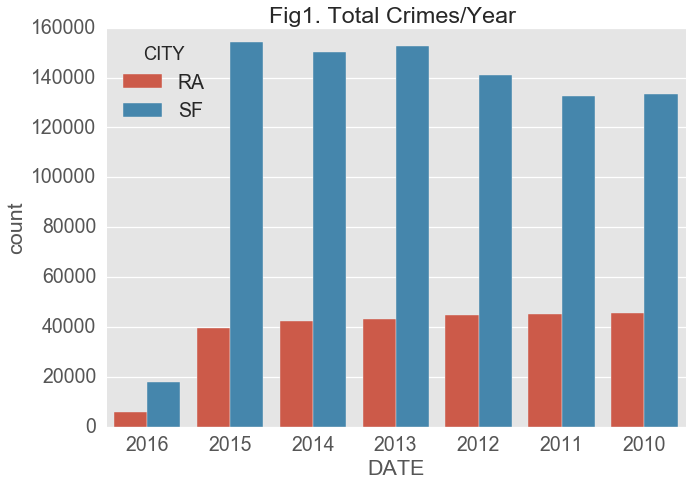

In [169]:
p = sns.csountplot(x=df['DATE'].dt.year,hue='CITY', data=df)
p.set(title="Fig1. Total Crimes/Year ")

In [217]:
pattern = "theft/|murder|homicide|AUTO, GRAND THEFT|GRAND THEFT FROM LOCKED AUTO|GRAND THEFT FROM UNLOCKED AUTO"
dff = df[(df['DESC'].str.contains(pattern,case=False))] 

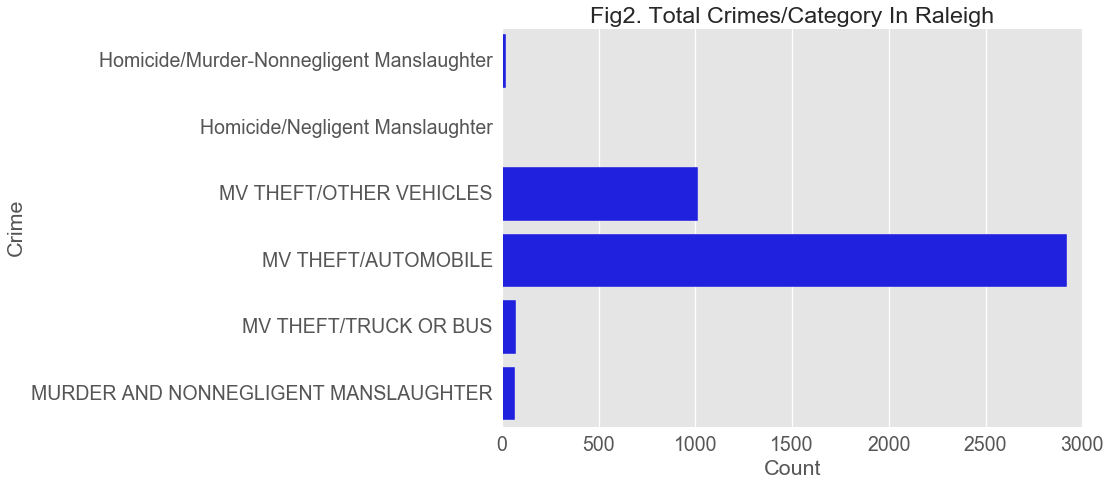

In [252]:
sns.countplot(data=dff[dff['CITY']=='RA'],y = 'DESC',color="Blue").set(xlabel='Count', ylabel='Crime',
                                                                       title="Fig2. Total Crimes/Category In Raleigh")

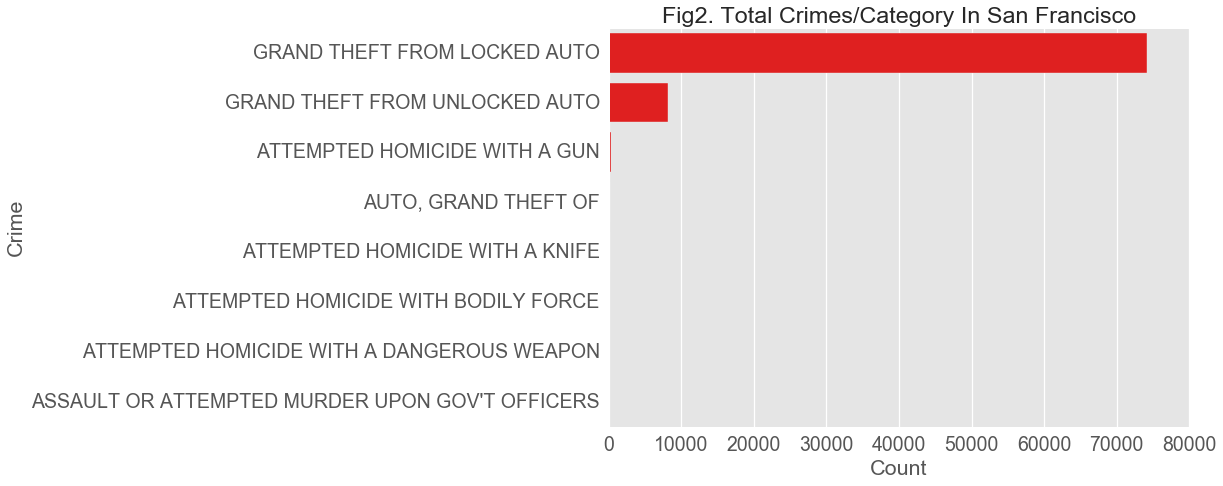

In [256]:
sns.countplot(data=dff[dff['CITY']=='SF'],y = 'DESC',color="Red").set(xlabel='Count', ylabel='Crime',
                                                                       title="Fig3. Total Crimes/Category In San Francisco")

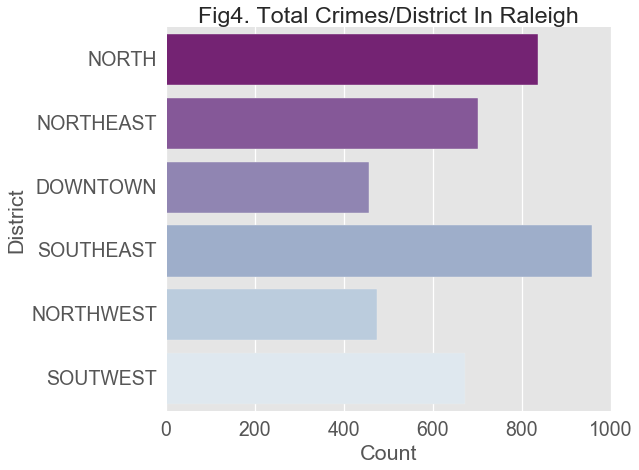

In [268]:
g = sns.factorplot(y="DISTRICT", data=dff[dff['CITY']=='RA'], kind="count",
                   palette="BuPu_r", size=6, aspect=1.5).set(xlabel='Count', ylabel='District',
                                                            title="Fig4. Total Crimes/District In Raleigh")


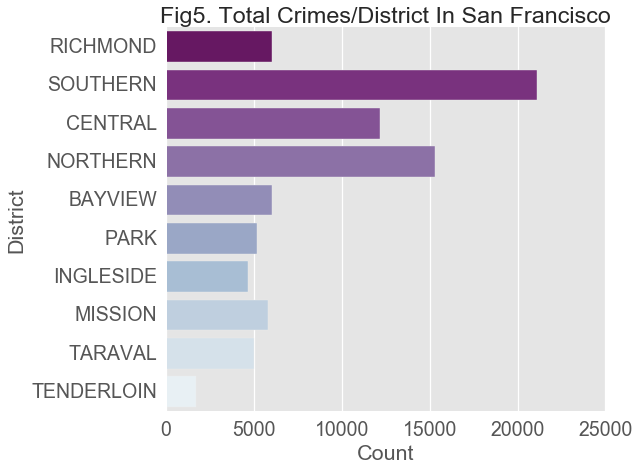

In [269]:
g = sns.factorplot(y="DISTRICT", data=dff[dff['CITY']=='SF'], kind="count",
                   palette="BuPu_r", size=6, aspect=1.5).set(xlabel='Count', ylabel='District',
                                                            title="Fig5. Total Crimes/District In San Francisco")

## Conclusion
Figure 1 is a very interesting one. Looking at the bar trends, we can conclude that San Francisco has become a more dangerous city over the past 5 years while the number of total crimes in Raleigh has been decreasing for the same period.  

Figure 2 and 3 are indicating that auto theft and related crimes are the main and major concerns in both cities.  
Figure 4 and 5 suggest that unlike one might think, downtown neighborhoods are not the worst when it comes to safety. Both figures show that there are areas not even close to downtown that are far unsafe. 
